# Import Basic Libararies

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
# for showing maximum columns which are present in dataset
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
# show top 5 rows in dataset
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2,2,2,11.0,NaN,New Property,NaN,NaN,543.57695,0,0,0,0,0,0,37
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2,2,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0,0,0,0,0,0,38
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4,4,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0,1,0,0,0,0,150
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3,4,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1,0,0,0,0,2,75
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.00,NaN,1,1,0,0,0,2,102


In [5]:
# show random 5 rows
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2812,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,0,72
1070,flat,raheja vedaanta,sector 108,1.50,5263.0,2850.0,Built Up area: 2850 (264.77 sq.m.),3,4,0,12.0,NaN,Undefined,NaN,2850.0,NaN,0,0,0,0,0,0,0
1701,flat,tulip violet,sector 69,1.32,8411.0,1569.0,Super Built up area 1568(145.67 sq.m.),3,3,1,12.0,South-West,Relatively New,1568.0,NaN,NaN,0,0,0,1,0,2,86
3229,flat,emaar mgf the palm drive,sector 66,2.99,14950.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3,3,3,7.0,East,Relatively New,2000.0,1800.0,1500.0,0,1,0,0,0,2,49
2612,flat,pyramid urban homes 2,sector 86,0.44,7321.0,601.0,Carpet area: 601 (55.83 sq.m.),2,2,2,6.0,East,Relatively New,NaN,NaN,601.0,0,0,0,0,0,2,63


In [6]:
# shape of the data
df.shape

(3677, 23)

* Before Outliers treatment we have 3677 rows and 23 columns 

In [7]:
# columns in dataset where we have to do Outliers treatment
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

* In some columns we got categorical dataset so we not work on that ,we work on only Numerical dataset

## Price 

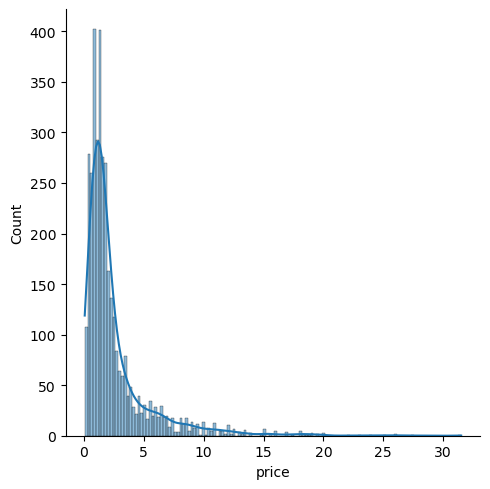

In [8]:
sns.displot(df['price'],kde=True)

* This Distplot shows that we have left skewed distribution, so we use IQR method for treatment of Outliers

<AxesSubplot:xlabel='price'>

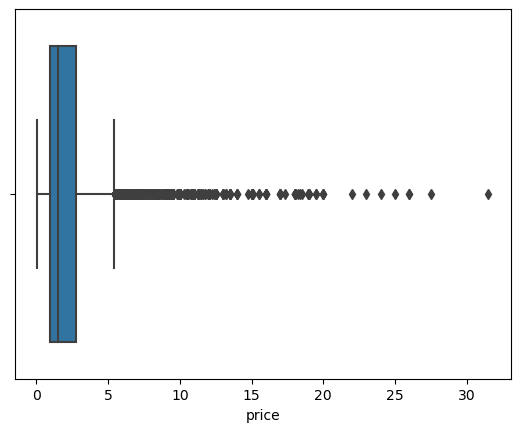

In [9]:
sns.boxplot(x=df['price'])

* Box plot shows there are so many outliers but in this dataset there are some genuine outliers as well so we look first into it.

In [10]:
# calculate the IQR for the price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# identifying Outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats


(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [11]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3773,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,74
1839,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1,1,0,1,1,2,42
2671,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,1,72
497,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,505.0,NaN,1,1,0,1,1,2,138
2700,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
783,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
1338,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,1000.0,NaN,1,1,1,1,0,2,145
371,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
761,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,2,31
155,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,502.0,NaN,1,1,1,1,0,2,153


* On the basis of price cols we can say that there are some genuine outliers but there are some data errors as well

## Price_Per_Sqft

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

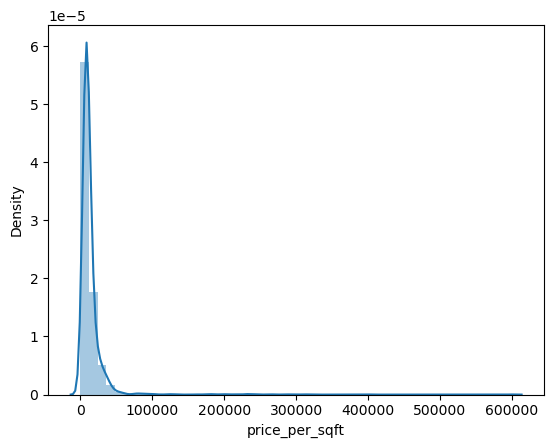

In [12]:
sns.distplot(df['price_per_sqft'])

* It shows Left skwed distribution,so we have to use IQR method for outliers Treatment

<AxesSubplot:xlabel='price_per_sqft'>

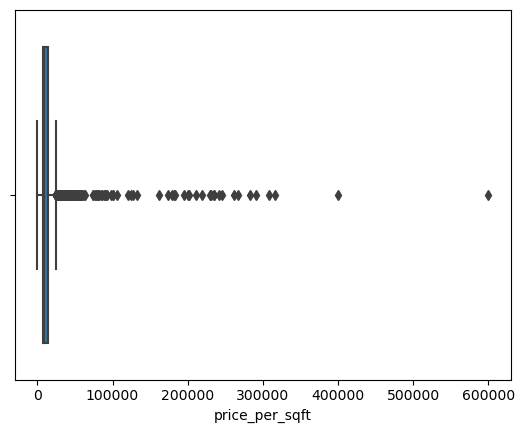

In [13]:
sns.boxplot(x=df['price_per_sqft'])

In [14]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [15]:
outliers_sqft

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,unitech deerwood chase,sector 50,8.45,235376.0,359.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.0,NaN,1,1,0,0,0,2,102
13,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,2.0,West,Old Property,NaN,109.0,NaN,1,0,0,0,0,0,79
15,house,eros rosewood city,sector 49,1.60,31481.0,508.0,Plot area 60(50.17 sq.m.),4,4,3,4.0,East,New Property,NaN,60.0,NaN,0,0,0,0,0,2,27
32,house,independent,sector 26,4.45,35185.0,1265.0,Plot area 150(125.42 sq.m.),4,4,3,3.0,West,Old Property,NaN,150.0,NaN,0,0,0,0,0,0,25
35,house,independent,sector 43,7.85,29074.0,2700.0,Plot area 300(250.84 sq.m.),9,9,3+,3.0,West,Relatively New,NaN,300.0,NaN,1,1,0,1,1,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3747,house,unitech deerwood chase,sector 50,15.00,33333.0,4500.0,Plot area 500(418.06 sq.m.),4,4,2,2.0,West,Moderately Old,NaN,500.0,NaN,0,1,0,0,0,0,160
3773,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,74
3788,house,independent,sector 4,1.25,78125.0,160.0,Built Up area: 160 (14.86 sq.m.),2,3,No,1.0,NaN,Undefined,NaN,160.0,NaN,0,0,0,0,0,0,0
3794,house,sushant lok 1 builder floors,sector 43,6.25,30728.0,2034.0,Plot area 226(188.96 sq.m.),7,7,3+,3.0,North,Moderately Old,NaN,226.0,NaN,1,1,1,0,0,0,46


* From above Data we can see that, where area is less than 1000 means, It needs unit conversion. 
* so we have to multiply with 9 which is less than 1000 so all values are in same unit that is sqft

In [16]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

In [17]:
outliers_sqft.sample(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1436,house,sushant lok 1 builder floors,sector 43,13.00,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,300.0,NaN,0,0,0,1,0,2,7
2081,house,vipul tatvam villa,sector 48,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4,4,2,NaN,East,Moderately Old,NaN,360.0,NaN,0,1,1,1,0,0,88
3023,house,independent,sector 43,5.50,28424.0,1935.0,Plot area 215(179.77 sq.m.),1,1,No,1.0,South-West,Old Property,NaN,215.0,NaN,0,0,0,0,1,0,12
3696,house,independent,sector 56,11.95,43534.0,2745.0,Plot area 305(255.02 sq.m.),12,12,3+,4.0,West,Relatively New,NaN,305.0,NaN,0,1,0,0,0,2,21
1813,flat,dlf park place,sector 54,5.75,24688.0,2329.0,Super Built up area 2329(216.37 sq.m.)Built Up...,3,4,3,12.0,North-East,Relatively New,2329.0,1900.0,1700.0,0,1,0,0,0,1,174
3085,house,independent,sector 26,8.90,32963.0,2700.0,Plot area 300(250.84 sq.m.),4,4,3+,2.0,South-East,Old Property,NaN,300.0,NaN,1,1,1,1,0,0,82
3492,house,ansal sushant lok plots,sector 43,3.30,26570.0,1242.0,Plot area 138(115.39 sq.m.),1,1,No,NaN,NaN,Under Construction,NaN,138.0,NaN,0,0,0,0,0,0,0
815,house,independent,sector 43,6.50,35400.0,1836.0,Plot area 215(179.77 sq.m.)Built Up area: 215 ...,5,4,3+,3.0,South-East,Moderately Old,NaN,215.0,NaN,0,1,0,1,0,2,54
3201,house,independent,sector 2,6.00,24691.0,2430.0,Plot area 270(225.75 sq.m.),5,6,3+,3.0,East,Old Property,NaN,270.0,NaN,1,0,0,1,1,2,43
3561,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,128.0,NaN,0,1,0,0,0,1,22


In [18]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

In [19]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

* By all this steps we progressilly down the mean as a practical mean

In [20]:
# update this steps with main dataframe
df.update(outliers_sqft)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

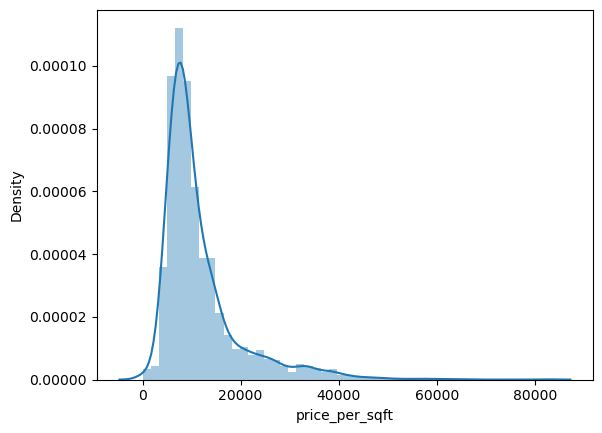

In [21]:
# Now plot distplot
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

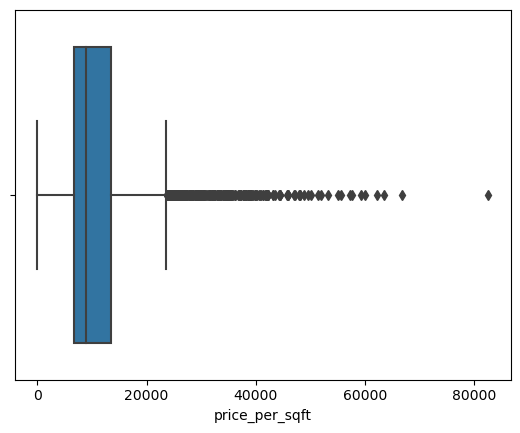

In [22]:
sns.boxplot(x=df['price_per_sqft'])

* But Now we have outliers which is Greater than 80000 price_per_sqft but this is not practical so we have to remove that. for that we have to mentioned range of 50000 price_per_sqft

In [23]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
159,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,No,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,250.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,160.0
456,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,316.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,153.0
492,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,2.0,103.0
497,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6.0,7.0,3+,2.0,North-East,New Property,NaN,505.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,138.0
543,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5.0,5.0,2,1.0,North-East,Old Property,NaN,400.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,122.0
2021,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,No,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2143,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16.0,17.0,3+,4.0,South,Relatively New,NaN,270.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,137.0
2489,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,1.0,72.0


In [24]:
df = df[df['price_per_sqft'] <= 50000]

<AxesSubplot:xlabel='price_per_sqft'>

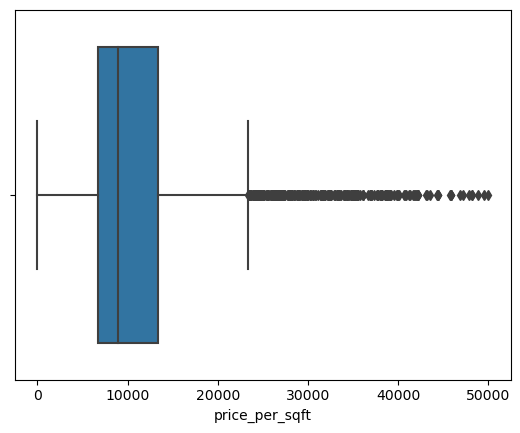

In [25]:
sns.boxplot(x=df['price_per_sqft'])

## Area

<AxesSubplot:xlabel='area', ylabel='Density'>

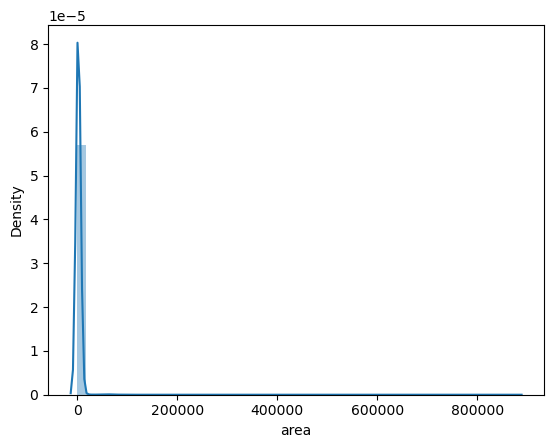

In [26]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

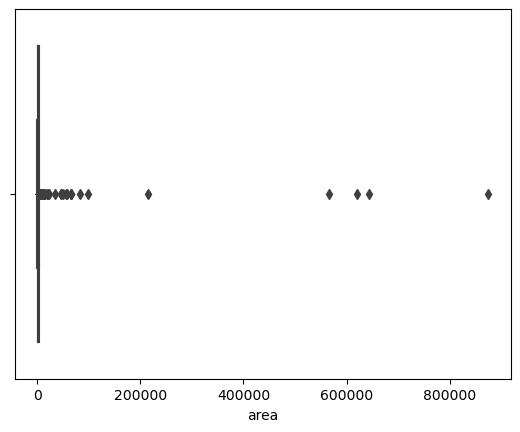

In [27]:
sns.boxplot(x=df['area'])

In [28]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [29]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1533,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
1988,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,44.0
2537,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0
2544,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
3496,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0


In [30]:
df = df[df['area'] < 100000]

<AxesSubplot:xlabel='area', ylabel='Density'>

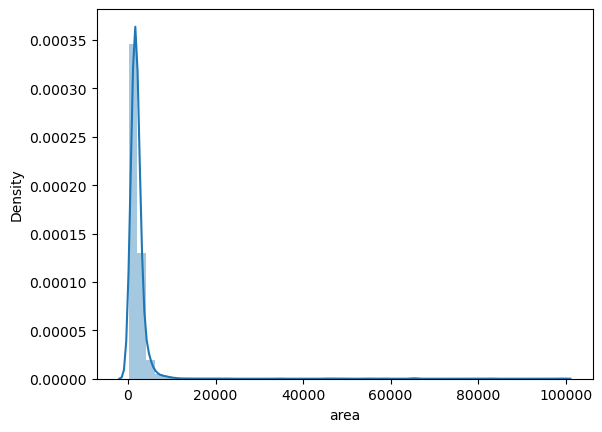

In [31]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

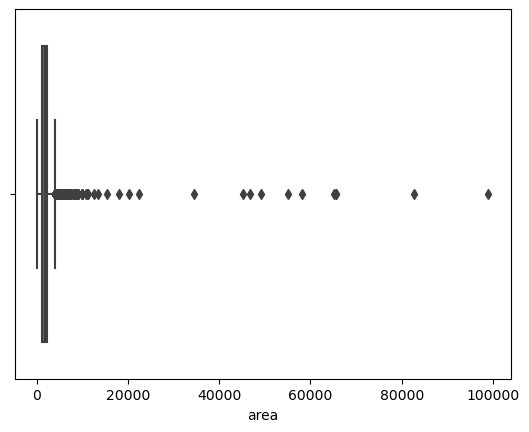

In [32]:
sns.boxplot(x=df['area'])

In [33]:
df[df['area'] > 10000].sort_values('area',ascending=False)
# 2982,3749,267,3163,307,2933,1021,2355,3659

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2982,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0.0,1.0,1.0,1.0,0.0,2.0,60.0
2499,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
3749,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.00,0.0,0.0,0.0,0.0,0.0,0.0,51.0
267,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.00,1.0,0.0,0.0,0.0,0.0,0.0,15.0
3176,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3163,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0.0,0.0,0.0,0.0,0.0,0.0,15.0
307,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2933,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1982,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
1021,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [34]:
df.drop(index=[2982,3749,267,3163,307,2933,1021,2355,3659],inplace=True)

In [35]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2499,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
3176,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0.0,1.0,1.0,0.0,0.0,2.0,109.0
2759,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0.0,1.0,0.0,0.0,0.0,2.0,61.0
217,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1.0,1.0,0.0,1.0,1.0,2.0,123.0
3263,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.00,1.0,0.0,0.0,1.0,1.0,2.0,44.0
598,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3.0,3.0,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0.0,1.0,0.0,0.0,0.0,0.0,160.0
777,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3.0,3.0,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0.0,0.0,0.0,0.0,0.0,0.0,55.0
1839,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,1254.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0
613,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0.0,1.0,0.0,0.0,0.0,0.0,60.0


In [36]:
df.loc[2499,'area'] = 115*9
df.loc[3176,'area'] = 7250
df.loc[1982,'area'] = 5800
df.loc[2759,'area'] = 2660
df.loc[217,'area'] = 2850
df.loc[3263,'area'] = 1812
df.loc[598,'area'] = 2160
df.loc[777,'area'] = 1175

<AxesSubplot:xlabel='area', ylabel='Density'>

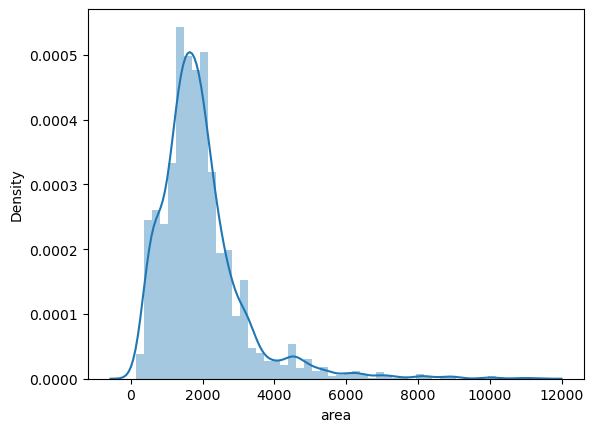

In [37]:
sns.distplot(df['area'])

<AxesSubplot:xlabel='area'>

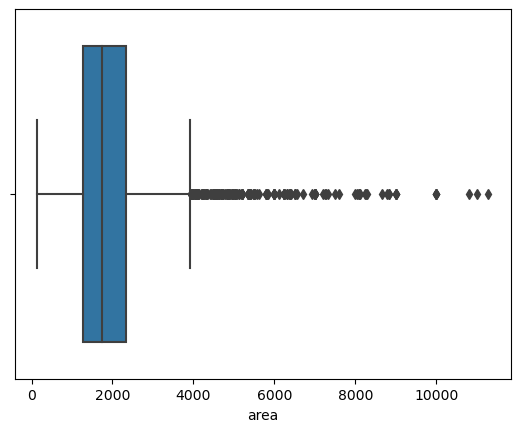

In [38]:
sns.boxplot(x=df['area'])

In [39]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

## Bedroom

<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

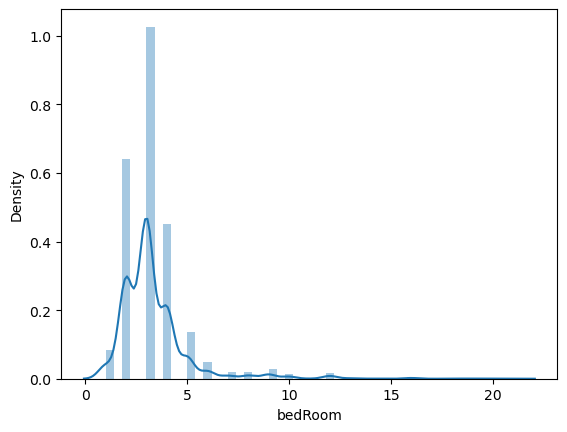

In [40]:
sns.distplot(df['bedRoom'])

<AxesSubplot:xlabel='bedRoom'>

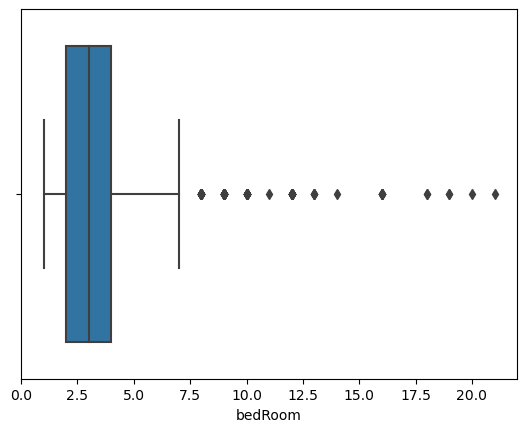

In [41]:
sns.boxplot(x=df['bedRoom'])

In [42]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [43]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=True)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2898,house,independent,sector 43,2.25,7500.0,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 s...,11.0,11.0,3+,5.0,West,New Property,NaN,3000.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,28.0
70,house,independent,sector 57,6.95,38611.0,1800.0,Plot area 192(160.54 sq.m.),12.0,12.0,3+,4.0,East,New Property,NaN,192.0,NaN,0.0,1.0,1.0,0.0,0.0,2.0,73.0
1929,house,independent,sector 43,7.50,38760.0,1935.0,Plot area 215(179.77 sq.m.),12.0,12.0,3+,4.0,East,New Property,NaN,215.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1973,house,independent,sector 31,9.25,39530.0,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 ...,12.0,12.0,3+,4.0,North-East,New Property,NaN,262.0,260.0,0.0,1.0,0.0,1.0,1.0,1.0,49.0
2218,house,independent,sector 43,2.20,6875.0,3200.0,Plot area 3200(297.29 sq.m.),12.0,12.0,3+,6.0,North,New Property,NaN,3200.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,50.0
2545,house,uppal southend,sector 49,6.75,32328.0,2088.0,Plot area 232(193.98 sq.m.),12.0,12.0,3+,3.0,North,Moderately Old,NaN,232.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,49.0
2552,house,independent,sector 40,9.50,40135.0,2367.0,Plot area 263(219.9 sq.m.),12.0,12.0,3+,4.0,NaN,New Property,NaN,263.0,NaN,0.0,0.0,1.0,0.0,0.0,2.0,57.0
2637,house,independent,sector 14,8.00,17707.0,4518.0,Plot area 502(419.74 sq.m.),12.0,4.0,3+,3.0,North,Old Property,NaN,502.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,32.0
2691,house,independent,sector 47,6.09,33665.0,1809.0,Plot area 201(168.06 sq.m.)Built Up area: 180 ...,12.0,11.0,3+,4.0,West,Moderately Old,NaN,180.0,150.0,0.0,0.0,0.0,1.0,0.0,1.0,44.0
3107,house,laxmi garden sector-11,sector 11,1.50,12820.0,1170.0,Plot area 130(108.7 sq.m.),12.0,9.0,1,3.0,East,Relatively New,NaN,130.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,106.0


In [44]:
df = df[df['bedRoom'] <= 10]

In [45]:
df.shape

(3588, 23)

<AxesSubplot:xlabel='bedRoom', ylabel='Count'>

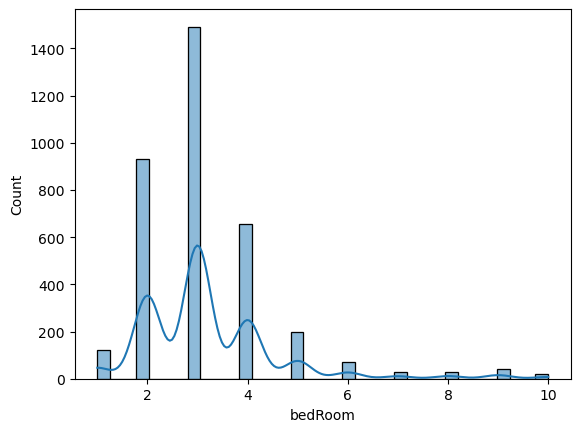

In [46]:
sns.histplot(df['bedRoom'],kde=True)

<AxesSubplot:xlabel='bedRoom'>

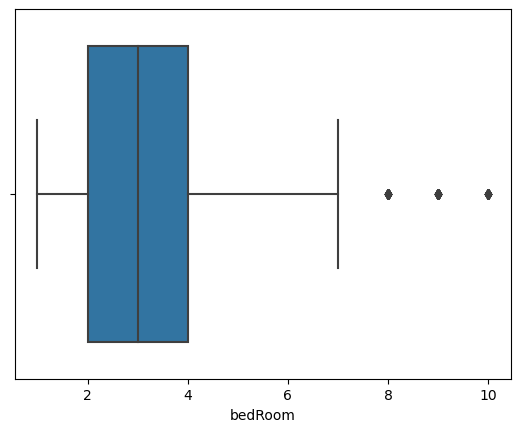

In [47]:
sns.boxplot(x=df['bedRoom'])

In [48]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

## Bathroom

<AxesSubplot:xlabel='bathroom', ylabel='Count'>

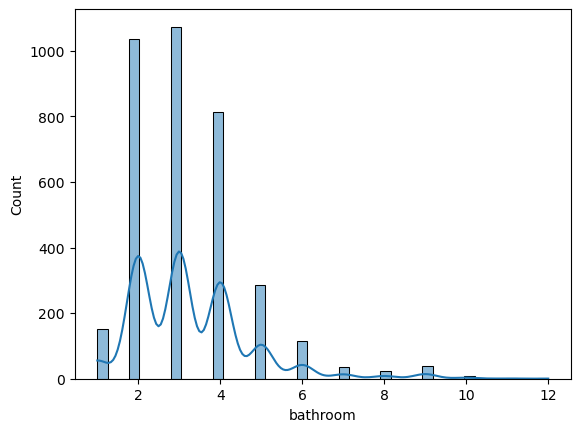

In [49]:
sns.histplot(df['bathroom'],kde=True)

<AxesSubplot:xlabel='bathroom'>

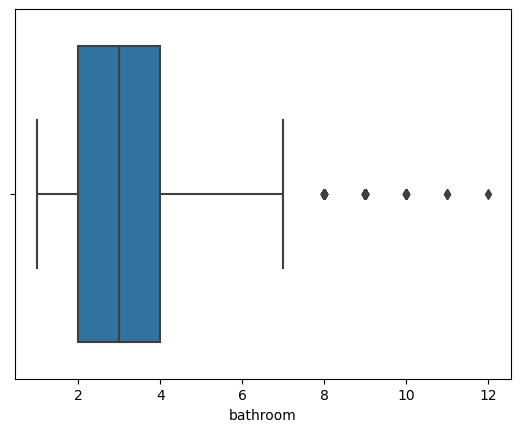

In [50]:
sns.boxplot(x=df['bathroom'])

In [51]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=True)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
228,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0
813,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,38.0
693,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0


* It is obvious show that flats/house which having 8 or 10 bedroom then that having 11 bathroom this is not outliers. 
This is Genuine Point

In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2.0,2.0,2,11.0,NaN,New Property,NaN,NaN,543.57695,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2.0,2.0,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,4.0,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0.0,1.0,0.0,0.0,0.0,0.0,150.0
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,4.0,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1.0,0.0,0.0,0.0,0.0,2.0,75.0
4,house,unitech deerwood chase,sector 50,8.45,26153.0,3231.0,Plot area 359(33.35 sq.m.),3.0,3.0,2,2.0,North-East,Old Property,NaN,359.00,NaN,1.0,1.0,0.0,0.0,0.0,2.0,102.0


## Super_build_up_area

<AxesSubplot:xlabel='super_built_up_area', ylabel='Density'>

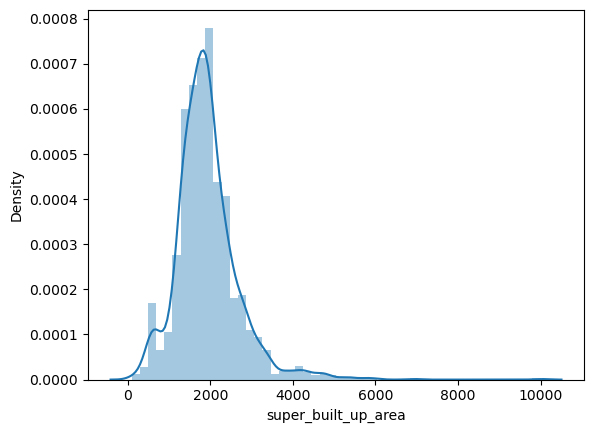

In [53]:
sns.distplot(df['super_built_up_area'])

<AxesSubplot:xlabel='super_built_up_area'>

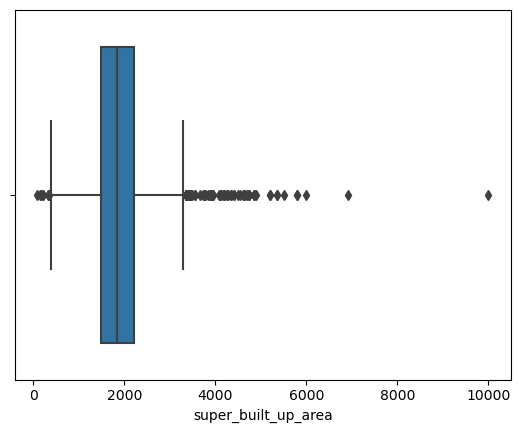

In [54]:
sns.boxplot(x=df['super_built_up_area'])

In [55]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [56]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1897,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0
2768,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0


## Build up area

<AxesSubplot:xlabel='built_up_area', ylabel='Density'>

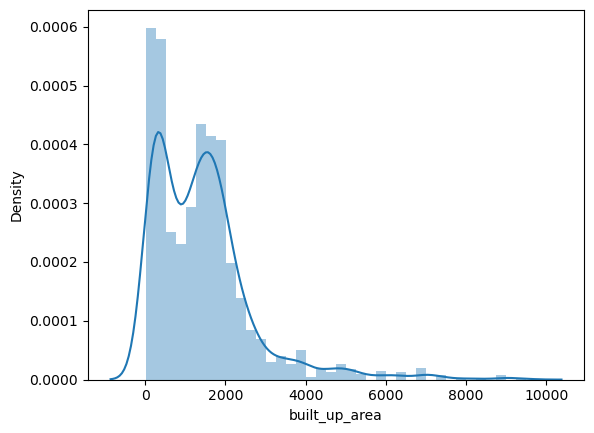

In [57]:
sns.distplot(df['built_up_area'])

<AxesSubplot:xlabel='built_up_area'>

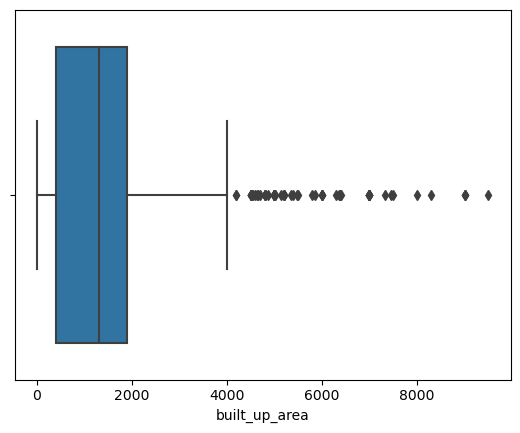

In [58]:
sns.boxplot(x=df['built_up_area'])

In [59]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score


## Carpet Area

<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

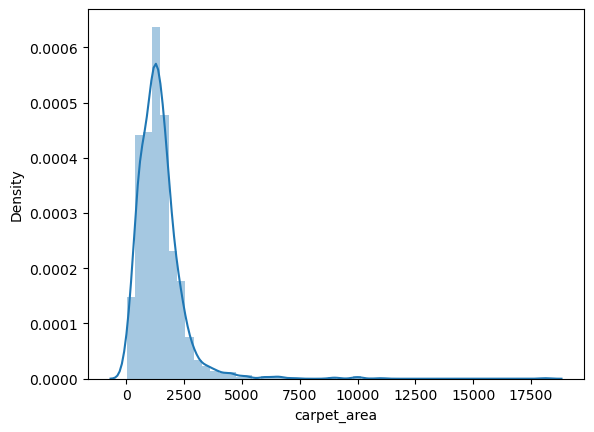

In [60]:
sns.distplot(df['carpet_area'])

<AxesSubplot:xlabel='carpet_area'>

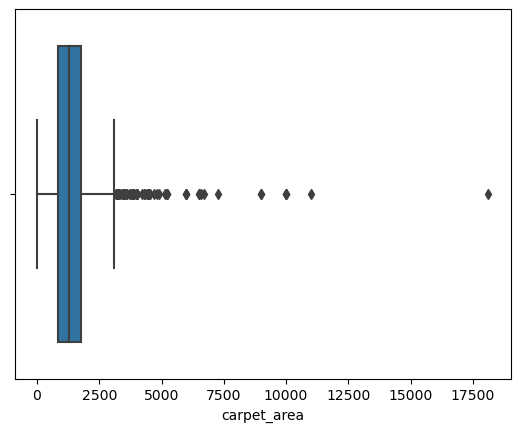

In [61]:
sns.boxplot(x=df['carpet_area'])

In [62]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
613,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0
3263,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0


In [63]:
df.loc[613,'carpet_area'] = 1812

In [64]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3263,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Undefined,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0


In [65]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7359.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2.0,2.0,2,11.0,NaN,New Property,NaN,NaN,543.57695,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1,flat,zara aavaas,sector 104,0.40,7029.0,569.0,Super Built up area 569(52.86 sq.m.),2.0,2.0,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,flat,ats triumph,sector 104,2.55,13076.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,4.0,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0.0,1.0,0.0,0.0,0.0,0.0,150.0
3,flat,experion the heartsong,sector 108,1.65,8237.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,4.0,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1.0,0.0,0.0,0.0,0.0,2.0,75.0
4,house,unitech deerwood chase,sector 50,8.45,26153.0,3231.0,Plot area 359(33.35 sq.m.),3.0,3.0,2,2.0,North-East,Old Property,NaN,359.00,NaN,1.0,1.0,0.0,0.0,0.0,2.0,102.0


## Luxury_Score

<AxesSubplot:xlabel='luxury_score', ylabel='Density'>

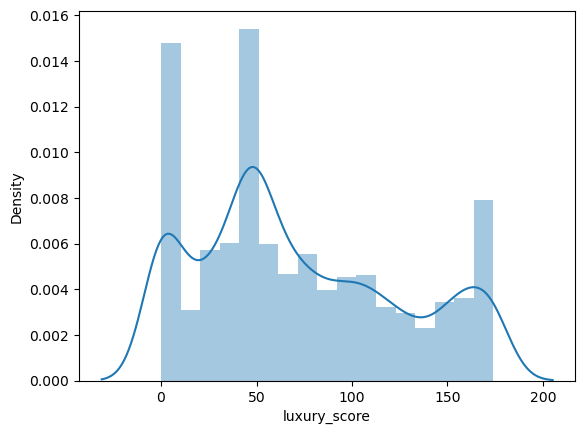

In [66]:
sns.distplot(df['luxury_score'])

<AxesSubplot:xlabel='luxury_score'>

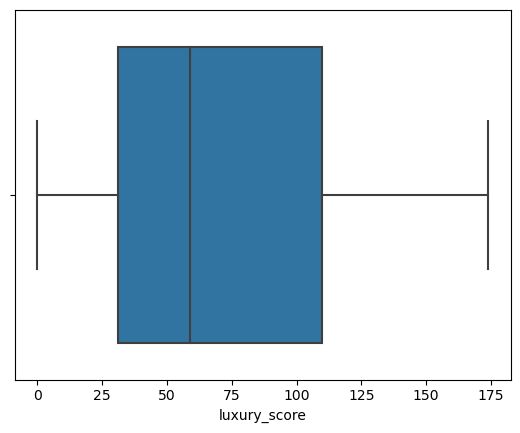

In [67]:
sns.boxplot(x=df['luxury_score'])

In [68]:
df.shape

(3588, 23)

## Price_per_sqft

In [69]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [70]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7353.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2.0,2.0,2,11.0,NaN,New Property,NaN,NaN,543.57695,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1,flat,zara aavaas,sector 104,0.40,7030.0,569.0,Super Built up area 569(52.86 sq.m.),2.0,2.0,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,flat,ats triumph,sector 104,2.55,13077.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,4.0,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0.0,1.0,0.0,0.0,0.0,0.0,150.0
3,flat,experion the heartsong,sector 108,1.65,8238.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,4.0,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1.0,0.0,0.0,0.0,0.0,2.0,75.0
4,house,unitech deerwood chase,sector 50,8.45,26153.0,3231.0,Plot area 359(33.35 sq.m.),3.0,3.0,2,2.0,North-East,Old Property,NaN,359.00,NaN,1.0,1.0,0.0,0.0,0.0,2.0,102.0


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

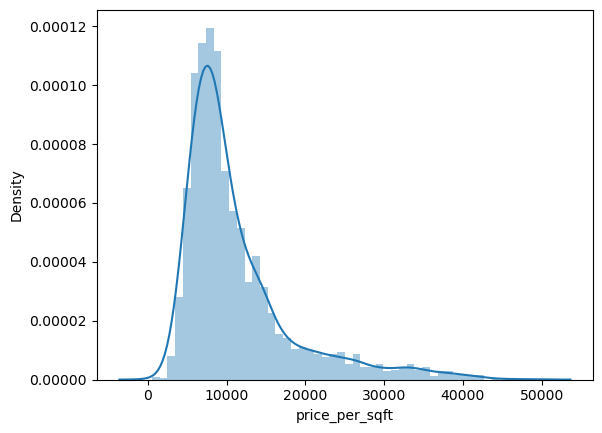

In [71]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot:xlabel='price_per_sqft'>

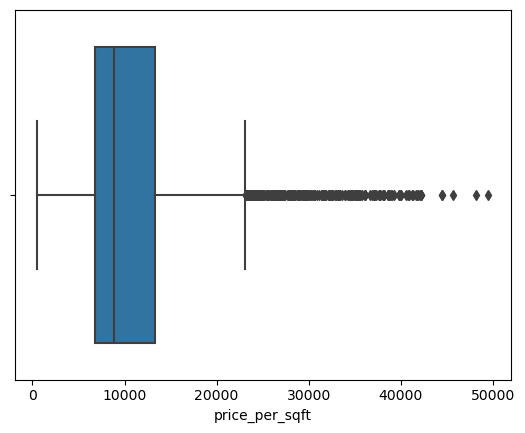

In [72]:
sns.boxplot(x=df['price_per_sqft'])

In [73]:

df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
72,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0
124,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,316.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1173,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,502.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
1371,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,97.0
1436,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,300.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
1551,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,316.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0
2295,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
2328,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
3523,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

183.33333333333334

In [75]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
8,house,my home,sector 110,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,3.0,West,Moderately Old,NaN,270.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,22.0
59,house,independent,sector 3 phase 3 extension,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),5.0,3.0,3,3.0,NaN,Moderately Old,NaN,450.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,house,independent,sector 4,0.50,10482.0,477.0,Built Up area: 53 (44.31 sq.m.),5.0,3.0,No,1.0,NaN,Undefined,NaN,53.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,house,sector 38 rwa,sector 38,4.30,28782.0,1494.0,Plot area 166(138.8 sq.m.)Built Up area: 165 s...,9.0,9.0,3+,3.0,East,Relatively New,NaN,165.0,164.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0
150,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5.0,3.0,3,3.0,NaN,Old Property,NaN,40.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,house,independent,sector 4,0.80,11852.0,675.0,Plot area 75(62.71 sq.m.),5.0,3.0,1,2.0,NaN,Moderately Old,NaN,75.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3624,house,independent,sector 9,0.42,9333.0,450.0,Built Up area: 450 (41.81 sq.m.),5.0,3.0,2,2.0,NaN,Undefined,NaN,450.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3668,house,independent,sector 104,0.60,5128.0,1170.0,Plot area 130(108.7 sq.m.),7.0,3.0,1,2.0,North,Moderately Old,NaN,130.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3691,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5.0,3.0,2,2.0,East,Old Property,NaN,477.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [76]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global orchard avenue,sector 93,0.40,7353.0,544.0,Carpet area: 543.53 (50.5 sq.m.),2.0,2.0,2,11.0,NaN,New Property,NaN,NaN,543.57695,0.0,0.0,0.0,0.0,0.0,0.0,37.0
1,flat,zara aavaas,sector 104,0.40,7030.0,569.0,Super Built up area 569(52.86 sq.m.),2.0,2.0,1,14.0,NaN,Relatively New,569.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38.0
2,flat,ats triumph,sector 104,2.55,13077.0,1950.0,Super Built up area 3150(292.64 sq.m.)Carpet a...,4.0,4.0,3+,21.0,East,Relatively New,3150.0,NaN,1950.00000,0.0,1.0,0.0,0.0,0.0,0.0,150.0
3,flat,experion the heartsong,sector 108,1.65,8238.0,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up...,3.0,4.0,3,3.0,North-West,Moderately Old,2003.0,1771.32,1302.01000,1.0,0.0,0.0,0.0,0.0,2.0,75.0
4,house,unitech deerwood chase,sector 50,8.45,26153.0,3231.0,Plot area 359(33.35 sq.m.),3.0,3.0,2,2.0,North-East,Old Property,NaN,359.00,NaN,1.0,1.0,0.0,0.0,0.0,2.0,102.0


In [77]:
df.describe()

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3571.000000,1875.000000,1613.000000,1850.000000,3588.000000,3588.00000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,2.427062,11285.669175,1943.761706,3.203735,3.272854,6.866424,1925.237627,1425.456311,1428.503717,0.186176,0.35563,0.089465,0.171962,0.107302,0.624025,71.825808
std,2.775399,7075.103090,1213.756243,1.393968,1.455585,6.057042,764.172177,1279.402065,1017.834145,0.389303,0.47877,0.285453,0.377400,0.309540,0.897571,53.249381
min,0.070000,544.000000,145.000000,1.000000,1.000000,0.000000,89.000000,14.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.950000,6756.500000,1258.750000,2.000000,2.000000,2.000000,1479.500000,400.000000,845.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,31.000000
50%,1.500000,8912.500000,1743.000000,3.000000,3.000000,5.000000,1828.000000,1300.000000,1300.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,59.000000
75%,2.650000,13296.250000,2311.250000,4.000000,4.000000,10.000000,2215.000000,1900.000000,1764.797500,0.000000,1.00000,0.000000,0.000000,0.000000,2.000000,110.000000
max,31.500000,49500.000000,11286.000000,10.000000,12.000000,51.000000,10000.000000,9500.000000,18122.000000,1.000000,1.00000,1.000000,1.000000,1.000000,2.000000,174.000000


In [78]:
df.to_csv('gurgaon_properties_outlier_treatment.csv',index=False)